# Data Understanding and Exploration

In [2]:
import numpy as np

In [3]:
import pandas as pd
dataset = pd.read_csv('https://raw.githubusercontent.com/nehahussain/Ds_ML_dataset/main/adverts.csv')

print('Total number of columns: ' + str(dataset.shape[1]) + "\n" + "Total number of rows: " + str(dataset.shape[0]))
print(dataset.info())

Total number of columns: 12
Total number of rows: 402005
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402005 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       402005 non-null  int64  
 1   mileage                401878 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        396627 non-null  object 
 4   standard_make          402005 non-null  object 
 5   standard_model         402005 non-null  object 
 6   vehicle_condition      402005 non-null  object 
 7   year_of_registration   368694 non-null  float64
 8   price                  402005 non-null  int64  
 9   body_type              401168 non-null  object 
 10  crossover_car_and_van  402005 non-null  bool   
 11  fuel_type              401404 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 34.1+ MB
None


In [4]:
for col in dataset.columns:
    print(col)

public_reference
mileage
reg_code
standard_colour
standard_make
standard_model
vehicle_condition
year_of_registration
price
body_type
crossover_car_and_van
fuel_type


In [5]:
dataset['public_reference'].value_counts()

202006039777689    1
202010275485050    1
202010275483687    1
202010275481519    1
202010275477294    1
                  ..
202005149317977    1
202005129292154    1
202004178973284    1
202004018825851    1
201512149444029    1
Name: public_reference, Length: 402005, dtype: int64

In [6]:
# this code statement helps us to find if there are any duplicate values in the column
pd.Series(dataset['public_reference']).is_unique

True

In [7]:
new = dataset[dataset['mileage'] < 1]
new['vehicle_condition'].value_counts()

NEW     15852
USED      355
Name: vehicle_condition, dtype: int64

In [8]:
df = dataset.sort_values('mileage', ascending=False)
df.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
43974,202008122406434,999999.0,63,White,Vauxhall,Astra,USED,2013.0,9999,Hatchback,False,Diesel
63569,202010235350884,990000.0,07,Red,Vauxhall,Zafira,USED,2007.0,1200,MPV,False,Diesel
85043,202010285542410,930000.0,56,Blue,BMW,1 Series,USED,2006.0,2500,Hatchback,False,Petrol
131508,202010064664710,788072.0,68,Blue,MINI,Countryman,USED,2018.0,22875,SUV,False,Petrol
115277,202010215262290,740000.0,14,Blue,Volvo,XC90,USED,2014.0,14795,SUV,False,Diesel


In [9]:
!pip install scipy

In [10]:
df = dataset.sort_values('mileage')
df.head(5)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
376481,202009163819142,0.0,NaN,Black,Volkswagen,Polo,NEW,NaN,17401,Hatchback,False,Petrol
11081,202007101107807,0.0,NaN,Black,Volvo,XC60,NEW,NaN,57645,SUV,False,Petrol Plug-in Hybrid
11082,202007221536420,0.0,NaN,White,Vauxhall,Grandland X,NEW,NaN,45995,SUV,False,Petrol Plug-in Hybrid
32906,202003278771163,0.0,NaN,White,Renault,Megane,NEW,NaN,63500,Hatchback,False,Petrol


In [11]:
df_mean = np.mean(dataset["mileage"])
df_std = np.std(df["mileage"])
print("Mean: " + str(round(df_mean, 2)))
print("Standard Deviation: " + str(round(df_std, 2)))

Mean: 37743.6
Standard Deviation: 34831.68


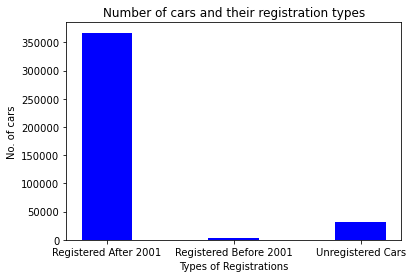

Total entries: 402005
Unregistered cars: 31857
Cars registered after 2001: 367233
Cars registered before 2001: 2915


In [12]:
import matplotlib.pyplot as plt

df_not_null = dataset[dataset['reg_code'].notnull() == True]
df_null = dataset[dataset['reg_code'].isna() == True]
df_alpha = df_not_null[df_not_null['reg_code'].str.isdigit() == False]
df_digits = df_not_null[df_not_null['reg_code'].str.isdigit() == True]

x_label = ['Registered After 2001', 'Registered Before 2001', 'Unregistered Cars']
y_label = [df_digits["reg_code"].count(), df_alpha["reg_code"].count(), df_null['reg_code'].isna().count()]
plt.bar(x_label, y_label, color ='blue',
        width = 0.4)
plt.xlabel("Types of Registrations")
plt.ylabel("No. of cars")
plt.title("Number of cars and their registration types")
plt.show()
print("Total entries: " + str(dataset.shape[0]))
print("Unregistered cars: " + str(df_null['reg_code'].isna().count()))
print("Cars registered after 2001: " + str(df_digits["reg_code"].count()))
print("Cars registered before 2001: " + str(df_alpha["reg_code"].count()))

C:\Users\Neha\AppData\Local\Temp\ipykernel_22052\480083072.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_label,rotation=90);


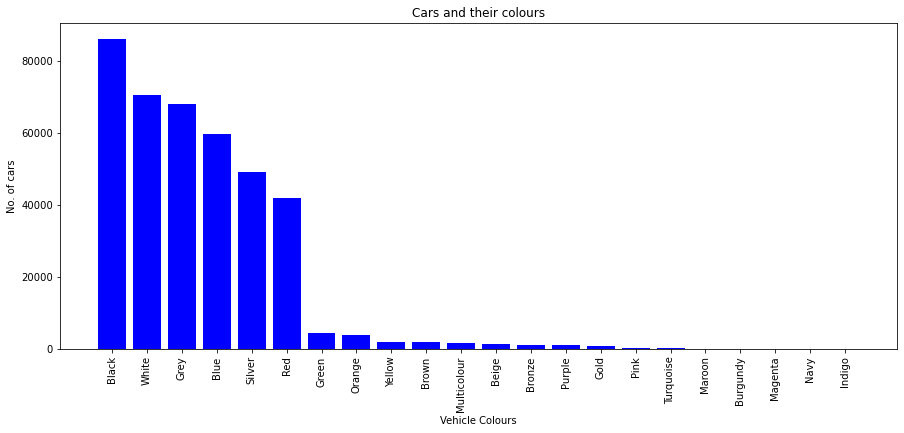

Cars with no colour mentioned: 5378


In [13]:
import matplotlib.pyplot as plt

vc = dataset['standard_colour'].value_counts()
vc.index = vc.index.astype(str)
vc_dict = vc.to_dict()
x_label = []
y_label = []
for key in vc_dict.keys():
    x_label.append(key)
    y_label.append(vc_dict[key])

plt.figure(figsize=(15, 6))
plt.bar(x_label, y_label, color ='blue',
        width = 0.8)
ax = plt.gca()
ax.set_xticklabels(labels=x_label,rotation=90);
plt.xlabel("Vehicle Colours")
plt.ylabel("No. of cars")
plt.title("Cars and their colours")
plt.show()

df_cars_null_colour = dataset[dataset['standard_colour'].isna() == True]
print("Cars with no colour mentioned: " + str(df_cars_null_colour.shape[0]))

In [14]:
dataset['standard_colour'].isnull().sum() 

5378

In [15]:
dataset['standard_colour'].value_counts()

Black          86287
White          70535
Grey           68227
Blue           59784
Silver         49323
Red            42024
Green           4534
Orange          4088
Yellow          2097
Brown           2014
Multicolour     1854
Beige           1539
Bronze          1330
Purple          1211
Gold             818
Pink             410
Turquoise        307
Maroon           159
Burgundy          63
Magenta           15
Navy               7
Indigo             1
Name: standard_colour, dtype: int64

No. of manufacturers: 110


C:\Users\Neha\AppData\Local\Temp\ipykernel_22052\1175485366.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_label,rotation=90);


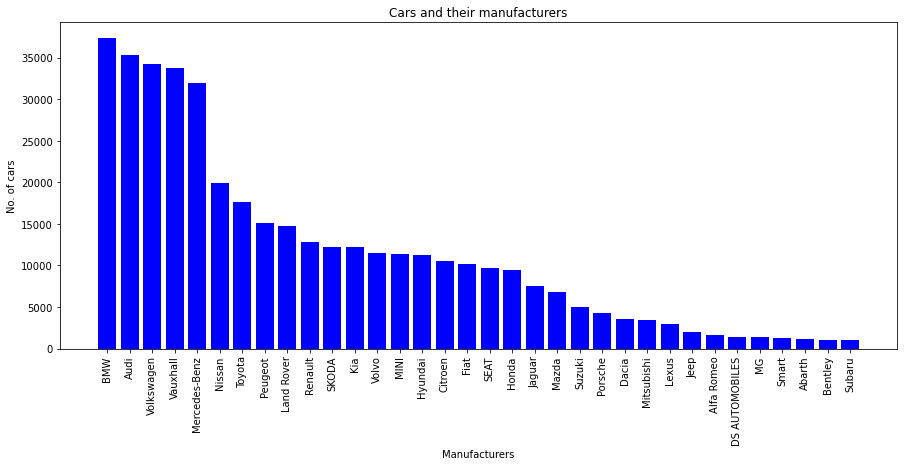

In [16]:
import matplotlib.pyplot as plt

vc = dataset['standard_make'].value_counts()
print("No. of manufacturers: " + str(len(vc)))
vc.index = vc.index.astype(str)
vc_dict = vc.to_dict()
x_label = []
y_label = []
for key in vc_dict.keys():
    if vc_dict[key] > 1000:
        x_label.append(key)
        y_label.append(vc_dict[key])

plt.figure(figsize=(15, 6))
plt.bar(x_label, y_label, color ='blue',
        width = 0.8)
ax = plt.gca()
ax.set_xticklabels(labels=x_label,rotation=90);
plt.xlabel("Manufacturers")
plt.ylabel("No. of cars")
plt.title("Cars and their manufacturers")
plt.show()

C:\Users\Neha\AppData\Local\Temp\ipykernel_22052\3721879516.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_label,rotation=90);


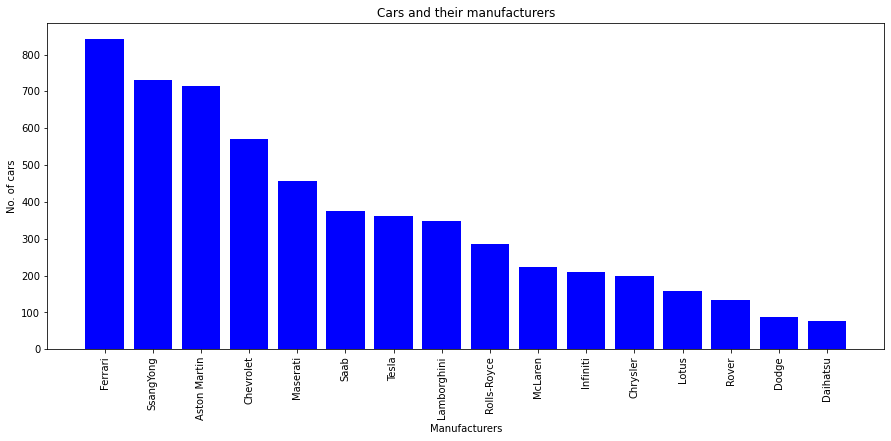

In [17]:
x_label = []
y_label = []
for key in vc_dict.keys():
    if vc_dict[key] < 1000 and vc_dict[key] >50 :
        x_label.append(key)
        y_label.append(vc_dict[key])

plt.figure(figsize=(15, 6))
plt.bar(x_label, y_label, color ='blue',
        width = 0.8)
ax = plt.gca()
ax.set_xticklabels(labels=x_label,rotation=90);
plt.xlabel("Manufacturers")
plt.ylabel("No. of cars")
plt.title("Cars and their manufacturers")
plt.show()

In [18]:
dataset['standard_model'].value_counts()
dataset.groupby(['standard_make','standard_model'])
group_size = dataset.groupby(['standard_make','standard_model']).size()
group_size.sort_values(ascending=False)

standard_make  standard_model
Volkswagen     Golf              11583
Vauxhall       Corsa             10646
Mercedes-Benz  C Class            8550
BMW            3 Series           8347
Volkswagen     Polo               7681
                                 ...  
Toyota         Mark II Blitz         1
GMC            Pickup                1
Fiat           Uno                   1
Toyota         Paseo                 1
Porsche        917                   1
Length: 1217, dtype: int64

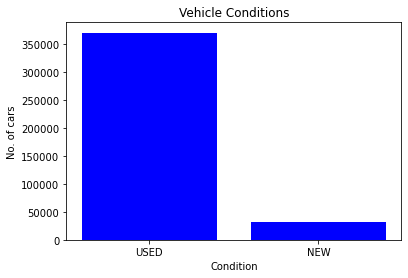

USED    370756
NEW      31249
Name: vehicle_condition, dtype: int64


In [19]:
vc = dataset['vehicle_condition'].value_counts()
vc.index = vc.index.astype(str)
vc_dict = vc.to_dict()
x_label = []
y_label = []
for key in vc_dict.keys():
    x_label.append(key)
    y_label.append(vc_dict[key])

plt.bar(x_label, y_label, color ='blue',
        width = 0.8)
plt.xlabel("Condition")
plt.ylabel("No. of cars")
plt.title("Vehicle Conditions")
plt.show()
print(vc)

In [20]:
print("No. of records with no year of registration: " + str(dataset[(dataset['year_of_registration'].isna() == True)].shape[0]))
vc = dataset['year_of_registration'].value_counts()
dataset[dataset['year_of_registration'] < 1900]

No. of records with no year of registration: 33311


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
59010,202006270588110,14000.0,07,Blue,Toyota,Prius,USED,1007.0,7000,Hatchback,False,Petrol Hybrid
69516,202010155035879,96659.0,65,Black,Audi,A4 Avant,USED,1515.0,10385,Estate,False,Diesel
84501,202009163810376,37771.0,63,Black,Smart,fortwo,USED,1063.0,4785,Coupe,False,Petrol
114737,202008102305925,30000.0,59,Red,Toyota,AYGO,USED,1009.0,4695,Hatchback,False,Petrol
120858,202010064654489,27200.0,66,Black,MINI,Clubman,USED,1016.0,18990,Estate,False,Diesel
190556,202010205206488,58470.0,10,Black,Fiat,Punto Evo,USED,1010.0,3785,Hatchback,False,Petrol
199830,202009013167637,23000.0,59,Silver,MINI,Hatch,USED,1009.0,5995,Hatchback,False,Petrol
199987,202010225311657,104000.0,08,Silver,BMW,1 Series,USED,1008.0,4395,Convertible,False,Petrol
201616,202010134937656,8600.0,68,Silver,BMW,M2,USED,1018.0,41990,Coupe,False,Petrol
201626,202010155037484,69346.0,64,Red,Mazda,Mazda3,USED,999.0,8795,Saloon,False,Petrol


In [21]:
vc = dataset['year_of_registration'].value_counts()
vc.sort_values(ascending=False)

2017.0    68790
2016.0    43483
2019.0    39236
2018.0    38300
2015.0    29019
          ...  
1018.0        1
1006.0        1
1008.0        1
1515.0        1
1015.0        1
Name: year_of_registration, Length: 84, dtype: int64

In [22]:
vc.head(10)       #Top 10years when vehicles were registered the most

2017.0    68790
2016.0    43483
2019.0    39236
2018.0    38300
2015.0    29019
2020.0    28683
2014.0    23666
2013.0    19117
2012.0    15312
2011.0    12614
Name: year_of_registration, dtype: int64

In [23]:
dataset['body_type'].value_counts()
missing_val = dataset[dataset['body_type'].isna() == True]
print("Vehicles with missing body type: {}".format(missing_val.shape[0]))
print(dataset['body_type'].value_counts())

Vehicles with missing body type: 837
Hatchback          167315
SUV                115872
Saloon              36641
Estate              24692
Coupe               23258
Convertible         16038
MPV                 16026
Pickup                620
Combi Van             214
Limousine             159
Minibus               149
Camper                 77
Panel Van              61
Window Van             41
Chassis Cab             3
Car Derived Van         2
Name: body_type, dtype: int64


C:\Users\Neha\AppData\Local\Temp\ipykernel_22052\1966702983.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_label,rotation=40);


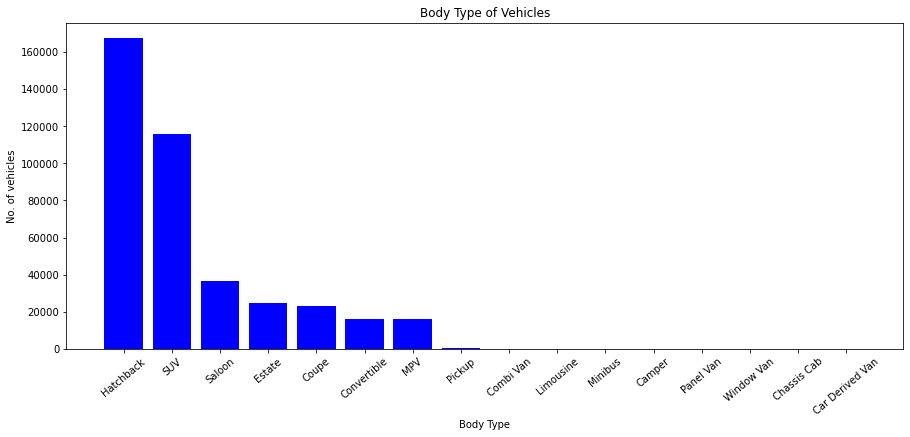

In [24]:
vc = dataset['body_type'].value_counts()
vc.index = vc.index.astype(str)
vc_dict = vc.to_dict()
x_label = []
y_label = []
for key in vc_dict.keys():
    x_label.append(key)
    y_label.append(vc_dict[key])

plt.figure(figsize=(15, 6))
ax = plt.gca()
ax.set_xticklabels(labels=x_label,rotation=40);
plt.bar(x_label, y_label, color ='blue',
        width = 0.8)
plt.xlabel("Body Type")
plt.ylabel("No. of vehicles")
plt.title("Body Type of Vehicles")
plt.show()

No. of missing values in crossover_car_and_van column: 0
False    400210
True       1795
Name: crossover_car_and_van, dtype: int64


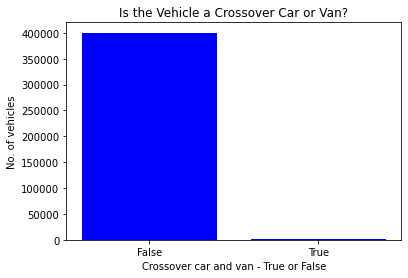

In [25]:
print(f"No. of missing values in crossover_car_and_van column: {dataset['crossover_car_and_van'].isnull().sum()}")
print(dataset['crossover_car_and_van'].value_counts())
x_label = ["False", "True"]
y_label = [(~dataset['crossover_car_and_van']).values.sum(), dataset['crossover_car_and_van'].values.sum()]
plt.bar(x_label, y_label, color ='blue',
        width = 0.8)
plt.xlabel("Crossover car and van - True or False")
plt.ylabel("No. of vehicles")
plt.title("Is the Vehicle a Crossover Car or Van?")
plt.show()

Petrol                   216929
Diesel                   158120
Petrol Hybrid             13602
Petrol Plug-in Hybrid      6160
Electric                   4783
Diesel Hybrid              1403
Bi Fuel                     221
Diesel Plug-in Hybrid       185
Natural Gas                   1
Name: fuel_type, dtype: int64
No. of missing values in fuel_type column: 601


C:\Users\Neha\AppData\Local\Temp\ipykernel_22052\1180713598.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=x_label,rotation=40);


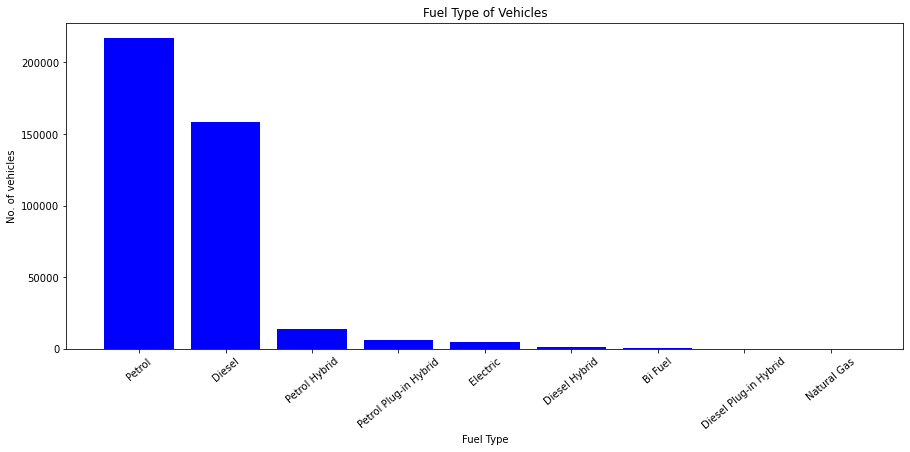

In [26]:
print(dataset['fuel_type'].value_counts())
print(f"No. of missing values in fuel_type column: {dataset['fuel_type'].isnull().sum()}")
vc = dataset['fuel_type'].value_counts()
vc.index = vc.index.astype(str)
vc_dict = vc.to_dict()
x_label = []
y_label = []
for key in vc_dict.keys():
    x_label.append(key)
    y_label.append(vc_dict[key])

plt.figure(figsize=(15, 6))
ax = plt.gca()
ax.set_xticklabels(labels=x_label,rotation=40);
plt.bar(x_label, y_label, color ='blue',
        width = 0.8)
plt.xlabel("Fuel Type")
plt.ylabel("No. of vehicles")
plt.title("Fuel Type of Vehicles")
plt.show()


In [27]:
mode_val = dataset['price'].mode()
print(f"Mean price of vehicle: {dataset['price'].mean():.2f}")
print(f"Median price of vehicle: {dataset['price'].median():.2f}")
print(f"Mode price of vehicle: {mode_val[0]:.2f}")
print(f"Standard Deviation in price of vehicle: {dataset['price'].std():.2f}")
print(f"Max price of vehicle: {dataset['price'].max():.2f}")
print(f"Min price of vehicle: {dataset['price'].min():.2f}")

Mean price of vehicle: 17341.97
Median price of vehicle: 12600.00
Mode price of vehicle: 8995.00
Standard Deviation in price of vehicle: 46437.46
Max price of vehicle: 9999999.00
Min price of vehicle: 120.00


In [28]:
temp = dataset[dataset['price'] == 9999999]
print(f"Count of vehicles: {temp['price'].count()}")
temp

Count of vehicles: 6


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
141833,202007050883898,87450.0,NaN,Red,Ferrari,250,USED,NaN,9999999,Coupe,False,Petrol
147188,202009103539048,100.0,NaN,Grey,Maserati,3500,USED,NaN,9999999,Convertible,False,Petrol
252505,202008112331147,46300.0,NaN,Blue,Ferrari,275,USED,NaN,9999999,Coupe,False,Petrol
305436,201812223434109,3600.0,NaN,Grey,Lamborghini,Miura,USED,NaN,9999999,Coupe,False,Petrol
336202,202001226429470,950.0,NaN,Black,Ferrari,LaFerrari,USED,NaN,9999999,Coupe,False,Petrol
336536,202006180262926,4400.0,NaN,White,Porsche,959,USED,NaN,9999999,Coupe,False,Petrol


In [29]:
res = dataset.sort_values(by='price', ascending=False)
res.tail()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
91878,202009083473638,100000.0,56,Silver,Renault,Clio,USED,2006.0,200,Hatchback,False,Petrol
109133,202010295564975,117500.0,52,Green,Citroen,C3,USED,2002.0,180,Hatchback,False,Petrol
303316,202010195173556,159000.0,X,Bronze,Honda,HR-V,USED,2000.0,150,SUV,False,Petrol
300445,202011015671489,89000.0,W,Green,Vauxhall,Corsa,USED,2000.0,122,Hatchback,False,Petrol
332532,202010315653263,78000.0,W,Blue,Citroen,Saxo,USED,2000.0,120,Hatchback,False,Petrol


In [30]:
df = dataset[dataset['price'] < 9999999]
temp = df.sort_values(by='price', ascending=False)
mode_val = temp['price'].mode()
print(f"Mean price of vehicle: {temp['price'].mean():.2f}")
print(f"Median price of vehicle: {temp['price'].median():.2f}")
print(f"Mode price of vehicle: {mode_val[0]:.2f}")
print(f"Standard Deviation in price of vehicle: {temp['price'].std():.2f}")
print(f"Max price of vehicle: {temp['price'].max():.2f}")
print(f"Min price of vehicle: {temp['price'].min():.2f}")

Mean price of vehicle: 17192.97
Median price of vehicle: 12600.00
Mode price of vehicle: 8995.00
Standard Deviation in price of vehicle: 25866.50
Max price of vehicle: 3799995.00
Min price of vehicle: 120.00


# Data Processing

### Detection of Erroneous and Missing Values

In [31]:
dataset[(dataset['reg_code'].isna() == True) & (dataset['vehicle_condition'] == 'USED')]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
630,202010275479166,54000.0,NaN,White,Toyota,Prius+,USED,2019.0,10900,MPV,False,Petrol Hybrid
682,202006019703585,103450.0,NaN,Bronze,BMW,3 Series,USED,2006.0,6000,Convertible,False,Petrol
1131,202009274274693,74000.0,NaN,Silver,Mercedes-Benz,SL Class,USED,2004.0,15950,Convertible,False,Petrol
1194,202010114878094,13000.0,NaN,White,Ferrari,599,USED,2017.0,79949,Coupe,False,Petrol
1335,202004018824812,76000.0,NaN,White,Aston Martin,DB4,USED,2018.0,495000,Saloon,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
397788,202009214000713,119400.0,NaN,White,Toyota,Prius,USED,2017.0,8995,Hatchback,False,Petrol Hybrid
397947,202010265437718,147898.0,NaN,Blue,Toyota,Prado,USED,2005.0,3250,Estate,False,Diesel
398865,202010074728813,74500.0,NaN,Silver,Toyota,Sienta,USED,2020.0,4250,MPV,False,Petrol
399728,202008262969804,12812.0,NaN,Silver,Rolls-Royce,Wraith,USED,NaN,159950,Coupe,False,Petrol


In [32]:
dataset[dataset['standard_colour'].isna() == True].shape[0]

5378

In [33]:
dataset[dataset['standard_make'].isna() == True].shape[0]  #no missing values

0

In [34]:
dataset[dataset['standard_model'].isna() == True].shape[0]  #no missing values

0

In [35]:
dataset[dataset['vehicle_condition'].isna() == True].shape[0]   #no missing Values

0

In [36]:
dataset[(dataset['year_of_registration'].isna() == True) & (dataset['vehicle_condition'] == 'USED')]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
54,202007030806426,30000.0,18,Red,Vauxhall,Insignia,USED,NaN,11990,Hatchback,False,Petrol
83,202008222801747,42847.0,61,Red,Honda,Jazz,USED,NaN,5695,Hatchback,False,Petrol
865,202010084741550,43130.0,66,White,Land Rover,Range Rover Sport,USED,NaN,35990,SUV,False,Diesel
968,202010305607535,63369.0,17,Blue,SKODA,Rapid Spaceback,USED,NaN,7490,Hatchback,False,Diesel
1256,202010225294466,18715.0,68,White,Volvo,V40,USED,NaN,16950,NaN,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
400536,202010094805399,40523.0,NaN,Red,Peugeot,108,USED,NaN,5999,Hatchback,False,Petrol
400725,202008252905656,45.0,20,Silver,Land Rover,Range Rover Evoque,USED,NaN,46945,SUV,False,Diesel
401314,202010315635541,12522.0,67,Red,Dacia,Sandero,USED,NaN,6300,Hatchback,False,Petrol
401323,201909222504136,46000.0,13,Grey,Volkswagen,Caravelle,USED,NaN,22995,MPV,False,Diesel


In [37]:
dataset[(dataset['year_of_registration'].isna() == True) & (dataset['vehicle_condition'] == 'USED') & 
        (dataset['reg_code'].isna() == True)]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1510,202010054642656,13406.0,NaN,White,Land Rover,Range Rover Evoque,USED,NaN,26000,Coupe,False,Diesel
2631,202010235350805,1000.0,NaN,Blue,Maserati,Levante,USED,NaN,63995,SUV,False,Petrol
4766,202003238706011,NaN,NaN,Grey,Subaru,Outback,USED,NaN,35995,Estate,False,Petrol
6998,202010225284269,160.0,NaN,Grey,McLaren,Senna,USED,NaN,699950,Coupe,False,Petrol
7517,202009234093511,11413.0,NaN,NaN,MINI,Convertible,USED,NaN,14400,Convertible,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...
392499,202010064681927,83555.0,NaN,Black,Land Rover,Range Rover Sport,USED,NaN,30995,SUV,False,Diesel
392730,202009093528195,38796.0,NaN,Grey,Rover,110,USED,NaN,3150,Saloon,False,Petrol
396985,202001256559400,29000.0,NaN,Black,Lamborghini,Gallardo,USED,NaN,77990,Coupe,False,Petrol
399728,202008262969804,12812.0,NaN,Silver,Rolls-Royce,Wraith,USED,NaN,159950,Coupe,False,Petrol


In [38]:
dataset[dataset['body_type'].isna() == True]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
307,202010245377951,33287.0,63,Red,Volkswagen,Caddy,USED,2013.0,10990,NaN,False,Diesel
625,202010255419023,55000.0,65,Grey,Vauxhall,Vivaro,USED,2015.0,10995,NaN,False,Diesel
1256,202010225294466,18715.0,68,White,Volvo,V40,USED,NaN,16950,NaN,False,Petrol
1643,202010305596351,24920.0,17,Blue,BMW,4 Series,USED,2017.0,21980,NaN,False,Diesel
1929,202010155047896,10.0,70,Blue,Lotus,Elise,USED,2020.0,47775,NaN,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
399677,202007111130539,5001.0,20,Black,Mercedes-Benz,GLC Class,USED,2020.0,36870,NaN,False,Diesel
400624,202010285545599,322000.0,05,Black,London Taxis International,TXI,USED,2005.0,995,NaN,False,Diesel
400643,202011015665976,10.0,NaN,White,Audi,A3,NEW,NaN,27845,NaN,False,Petrol
400724,202008242879192,0.0,L,Silver,Porsche,911,USED,1973.0,175000,NaN,False,Petrol


In [39]:
dataset[dataset['crossover_car_and_van'].isna() == True].shape[0]   # no missing Values

0

In [40]:
print(f"{dataset[dataset['fuel_type'].isna() == True].shape[0]} records have null values in fuel_type column")
dataset[dataset['fuel_type'].isna() == True]

601 records have null values in fuel_type column


,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1309,202010305621511,10.0,NaN,Black,BMW,5 Series,NEW,NaN,51395,Estate,False,NaN
2059,202003128359933,0.0,NaN,NaN,Jaguar,XF,NEW,NaN,35990,Estate,False,NaN
2666,202010305598848,10.0,NaN,Grey,Volvo,V60,NEW,NaN,31414,Estate,False,NaN
3724,202005129287540,61568.0,14,Silver,Toyota,Prius,USED,2020.0,7995,Hatchback,False,NaN
4027,202010295581781,10.0,NaN,Black,Mercedes-Benz,A Class,NEW,NaN,36584,Hatchback,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
398867,202010074730787,0.0,NaN,NaN,Jaguar,XF,NEW,NaN,32585,Saloon,False,NaN
399004,202010315654843,1.0,NaN,Black,Peugeot,508,NEW,NaN,39135,Hatchback,False,NaN
399025,202005289599976,17.0,19,NaN,McLaren,Senna,USED,2019.0,799900,NaN,False,NaN
399736,202009033258549,10.0,NaN,Black,Vauxhall,Grandland X,NEW,NaN,31190,SUV,False,NaN


In [41]:
dataset[dataset['year_of_registration'] >= 2000]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol


In [42]:
dataset['year_of_registration'].unique()

array([  nan, 2011., 2017., 2016., 2015., 2013., 2008., 2019., 2010.,
       2012., 2018., 2009., 1984., 2014., 2003., 2006., 2020., 2005.,
       2000., 2002., 2007., 2004., 1991., 2001., 1986., 1998., 1990.,
       1993., 1987., 1994., 1999., 1970., 1988., 1995., 1997., 1969.,
       1992., 1989., 1996., 1976., 1983., 1980., 1973., 1962., 1967.,
       1972., 1982., 1968., 1979., 1964., 1933., 1981., 1985., 1978.,
       1971., 1974., 1966., 1977., 1961., 1965., 1007., 1957., 1515.,
       1963., 1063., 1954., 1975., 1955., 1009., 1016., 1960., 1956.,
       1959., 1909., 1934., 1958., 1010., 1950., 1008., 1018.,  999.,
       1017., 1952., 1006., 1015.])

In [43]:
print("Records with null mileage value: " + str(dataset[dataset["mileage"].isna() == True].shape[0]))
print("Skewness in mileage column: " + 
      str(dataset['mileage'].skew(axis=0, skipna=True).round(decimals=2)))
# As the mileage column is skewed, we will need to use median to fill the NaN (null) values
print(dataset['mileage'].median())   # mileage median

Records with null mileage value: 127
Skewness in mileage column: 1.45
28629.5


In [44]:
print("Records with null year_of_registration value: " 
      + str(dataset[(dataset["year_of_registration"].isna() == True) 
                    & (dataset["vehicle_condition"] == "USED")].shape[0]))
print("Skewness in year_of_registration column: " + 
      str(dataset['year_of_registration'].skew(axis=0, skipna=True).round(decimals=2)))
# As the year_of_registration column is skewed, we will need to use median to fill the NaN (null) values
print(dataset['year_of_registration'].median())

Records with null year_of_registration value: 2062
Skewness in year_of_registration column: -87.91
2016.0


In [45]:
dataset[dataset["year_of_registration"]<1900]["year_of_registration"].value_counts().sum()

17

checking if the reg_code is present to use it to fill year of registration

In [46]:
dataset[ (dataset['reg_code'].isna() == False) & (dataset['year_of_registration'].isna() == True) ]

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
54,202007030806426,30000.0,18,Red,Vauxhall,Insignia,USED,NaN,11990,Hatchback,False,Petrol
83,202008222801747,42847.0,61,Red,Honda,Jazz,USED,NaN,5695,Hatchback,False,Petrol
865,202010084741550,43130.0,66,White,Land Rover,Range Rover Sport,USED,NaN,35990,SUV,False,Diesel
968,202010305607535,63369.0,17,Blue,SKODA,Rapid Spaceback,USED,NaN,7490,Hatchback,False,Diesel
1256,202010225294466,18715.0,68,White,Volvo,V40,USED,NaN,16950,NaN,False,Petrol
...,...,...,...,...,...,...,...,...,...,...,...,...
400336,202010315635977,66287.0,63,Blue,Vauxhall,Astra GTC,USED,NaN,8400,Coupe,False,Petrol
400725,202008252905656,45.0,20,Silver,Land Rover,Range Rover Evoque,USED,NaN,46945,SUV,False,Diesel
401314,202010315635541,12522.0,67,Red,Dacia,Sandero,USED,NaN,6300,Hatchback,False,Petrol
401323,201909222504136,46000.0,13,Grey,Volkswagen,Caravelle,USED,NaN,22995,MPV,False,Diesel


In [47]:
# Fixing year_of_registration column
reg_code_mapping = {
    '02': 2002,'03': 2003,'04': 2004,'05': 2005,'06': 2006,'07': 2007,'08': 2008,'09': 2009,
    '10': 2010,'11': 2011,'12': 2012,'13': 2013,'14': 2014,'15': 2015,'16': 2016,'17': 2017,'18': 2018,'19': 2019,'20': 2020,
    '51': 2001,'52': 2002, '53': 2003,'54': 2004,'55': 2005,'56': 2006,'57': 2007,'58': 2008,'59': 2009,
    '60': 2010,'61': 2011,'62': 2012,'63': 2013,'64': 2014,'65': 2015,'66': 2016,'67': 2017,'68': 2018,'69': 2019,'70': 2020
}

for index, row in dataset.iterrows():
    if row['reg_code'] in reg_code_mapping:
        dataset.at[index, 'year_of_registration'] = reg_code_mapping[row['reg_code']]

In [48]:
for index, row in dataset.iterrows():
    if pd.isnull(row['year_of_registration']) and row['vehicle_condition'] == 'USED':
        dataset.at[index, 'year_of_registration'] = 2016

# dataset[(dataset1['year_of_registration'].isna() == True) & (dataset['vehicle_condition'].isna() == 'USED')]
# the above statement will give empty dataframe to show no missing year_of_registration values for used vehicles

In [49]:
dataset[ (dataset['reg_code'].isna() == False) & (dataset['year_of_registration'].isna() == True)]  #no result, hence its filled

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type


In [50]:
print("Mode of standard_colour: " + str(dataset['standard_colour'].mode()[0]))
print("\nMode of body_type: " + str(dataset['body_type'].mode()[0]))
print("\nMode of fuel_type: " + str(dataset['fuel_type'].mode()[0]))

Mode of standard_colour: Black

Mode of body_type: Hatchback

Mode of fuel_type: Petrol


In [51]:
# this statement drops the six records with the missing values and the erroneous price
dataset.drop(dataset[dataset['price'] == 9999999].index, inplace=True)

In [52]:
#Resetting index after dropping rows
dataset.reset_index()

,index,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid
1,1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel
2,2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2014.0,26995,SUV,False,Diesel
...,...,...,...,...,...,...,...,...,...,...,...,...,...
401994,402000,202010315652942,5179.0,69,Grey,Peugeot,208,USED,2019.0,10595,Hatchback,False,Petrol
401995,402001,202010315657341,110000.0,59,Red,Peugeot,107,USED,2009.0,2000,Hatchback,False,Petrol
401996,402002,202010315659271,52760.0,62,White,Nissan,Qashqai,USED,2012.0,7250,SUV,False,Petrol
401997,402003,202011015662436,10250.0,65,Red,Abarth,595,USED,2015.0,11490,Hatchback,False,Petrol


In [53]:
dataset = dataset.fillna({'mileage': dataset['mileage'].median(), 'standard_colour': 'Black', 
               'body_type': 'Hatchback', 'fuel_type': 'Petrol'})

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401999 entries, 0 to 402004
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   public_reference       401999 non-null  int64  
 1   mileage                401999 non-null  float64
 2   reg_code               370148 non-null  object 
 3   standard_colour        401999 non-null  object 
 4   standard_make          401999 non-null  object 
 5   standard_model         401999 non-null  object 
 6   vehicle_condition      401999 non-null  object 
 7   year_of_registration   370750 non-null  float64
 8   price                  401999 non-null  int64  
 9   body_type              401999 non-null  object 
 10  crossover_car_and_van  401999 non-null  bool   
 11  fuel_type              401999 non-null  object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 37.2+ MB


In [55]:
dataset[(dataset["reg_code"].isna()==True) & (dataset["vehicle_condition"]=="NEW")]["public_reference"].value_counts().sum()
#new vehicles which dont have the reg_code, which is justified.

31249

## Feature Engineering

### mileage_type

In [56]:
dataset['mileage'].describe()

count    401999.000000
mean      37740.924592
std       34826.586976
min           0.000000
25%       10487.000000
50%       28630.000000
75%       56852.000000
max      999999.000000
Name: mileage, dtype: float64

In [57]:
def categorize_mileage(mileage):
    if mileage < 30000:
        return 'low'
    elif mileage >= 30000 and mileage < 600000:
        return 'medium'
    else:
        return 'high'

dataset['mileage_type'] = dataset['mileage'].apply(categorize_mileage)

In [58]:
dataset[['standard_make','mileage','mileage_type', 'price']]

,standard_make,mileage,mileage_type,price
0,Volvo,0.0,low,73970
1,Jaguar,108230.0,medium,7000
2,SKODA,7800.0,low,14000
3,Vauxhall,45000.0,medium,7995
4,Land Rover,64000.0,medium,26995
...,...,...,...,...
402000,Peugeot,5179.0,low,10595
402001,Peugeot,110000.0,medium,2000
402002,Nissan,52760.0,medium,7250
402003,Abarth,10250.0,low,11490


### luxury_vehicle

In [59]:
auto_manufacturers = list(dataset['standard_make'].unique())
luxury_manufacturers = ['Jaguar', 'Land Rover', 'Audi', 'Mercedes-Benz', 'BMW', 'Ferrari', 'Bentley', 'Aston Martin', 'McLaren',
                       'Porsche', 'Maserati', 'Rolls-Royce', 'Lexus', 'Jeep', 'Lamborghini', 'Bugatti', 'Maybach', 'Pagani', 
                        'Alfa Romeo', 'Cadillac']
body_type = list(dataset['body_type'].unique())
luxury_body_type = ['Convertible', 'Limousine', 'Coupe', 'Saloon']
dataset['luxury_vehicle'] = ((dataset['standard_make'].isin(luxury_manufacturers)) | 
(dataset['body_type'].isin(luxury_body_type)))
dataset[['standard_make', 'body_type', 'luxury_vehicle', 'price']]

,standard_make,body_type,luxury_vehicle,price
0,Volvo,SUV,False,73970
1,Jaguar,Saloon,True,7000
2,SKODA,SUV,False,14000
3,Vauxhall,Hatchback,False,7995
4,Land Rover,SUV,True,26995
...,...,...,...,...
402000,Peugeot,Hatchback,False,10595
402001,Peugeot,Hatchback,False,2000
402002,Nissan,SUV,False,7250
402003,Abarth,Hatchback,False,11490


### vehicle_age

In [60]:
def vehicle_age_calculation(year_of_registration):
    if pd.isnull(year_of_registration):
        return 0
    else:
        return (2022-year_of_registration)

dataset['vehicle_age'] = dataset['year_of_registration'].apply(vehicle_age_calculation)

In [61]:
dataset.head()

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type,mileage_type,luxury_vehicle,vehicle_age
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid,low,False,0.0
1,202007020778260,108230.0,61,Blue,Jaguar,XF,USED,2011.0,7000,Saloon,False,Diesel,medium,True,11.0
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol,low,False,5.0
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel,medium,False,6.0
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2014.0,26995,SUV,False,Diesel,medium,True,8.0


In [62]:
dataset = dataset.drop(['public_reference', 'reg_code', 'crossover_car_and_van', 'standard_model'], axis=1)
dataset.head()

,mileage,standard_colour,standard_make,vehicle_condition,year_of_registration,price,body_type,fuel_type,mileage_type,luxury_vehicle,vehicle_age
0,0.0,Grey,Volvo,NEW,NaN,73970,SUV,Petrol Plug-in Hybrid,low,False,0.0
1,108230.0,Blue,Jaguar,USED,2011.0,7000,Saloon,Diesel,medium,True,11.0
2,7800.0,Grey,SKODA,USED,2017.0,14000,SUV,Petrol,low,False,5.0
3,45000.0,Brown,Vauxhall,USED,2016.0,7995,Hatchback,Diesel,medium,False,6.0
4,64000.0,Grey,Land Rover,USED,2014.0,26995,SUV,Diesel,medium,True,8.0


## Association and Group Difference Analysis

### Quantitative-Quantitative

#### Mileage - Price

In [63]:
import scipy.stats as stats

mileage = dataset['mileage']
price = dataset['price']

# Association Analysis using Pearson's correlation coefficient
corr, p_value = stats.pearsonr(mileage, price)
print('Pearson correlation coefficient:', corr)
print('p-value:', p_value)

# Group Difference Analysis using a t-test
t_stat, p_value = stats.ttest_ind(mileage, price)
print('t-statistic:', t_stat)
print('p-value:', p_value)

Pearson correlation coefficient: -0.28529891171080324
p-value: 0.0
t-statistic: 300.31367014617877
p-value: 0.0


#### Age of vehicle - Price 

In [64]:
vehicle_age = dataset['vehicle_age']
price = dataset['price']

# Association Analysis using Pearson's correlation coefficient
corr, p_value = stats.pearsonr(vehicle_age, price)
print('Pearson correlation coefficient:', corr)
print('p-value:', p_value)

# Group Difference Analysis using a t-test
t_stat, p_value = stats.ttest_ind(vehicle_age, price)
print('t-statistic:', t_stat)
print('p-value:', p_value)

Pearson correlation coefficient: -0.22951303940756063
p-value: 0.0
t-statistic: -421.2714211560148
p-value: 0.0


### Quantitative-Categorical

#### Mileage type - Price

In [65]:
import scipy.stats as stats

def categorize_mileage_numeric(mileage):
    if mileage < 30000:
        return 0
    elif mileage >= 30000 and mileage < 600000:
        return 1
    else:
        return 2

dataset['mileage_type_numeric'] = dataset['mileage'].apply(categorize_mileage_numeric)

quantitative_var = dataset['price']
categorical_var = dataset['mileage_type_numeric']

# Association analysis using ANOVA
f_stat, p_value = stats.f_oneway(quantitative_var, categorical_var)
print(f'F-statistic:', f_stat.round(decimals=2))
print('p-value:', p_value)

# Group difference analysis using t-test
grouped_ttest = df.groupby(categorical_var)
print(grouped_ttest.apply(lambda x: stats.ttest_ind(x['price'], quantitative_var, equal_var=False)))


F-statistic: 177593.55
p-value: 0.0
mileage_type_numeric
0                     (77.56207457445461, 0.0)
1                   (-145.44611524423587, 0.0)
2    (-2.667088407500114, 0.03715639803207545)
dtype: object


#### Luxury Vehicle - Price

In [66]:
def boolean_to_numeric(luxury_vehicle):
    if luxury_vehicle == False:
        return 0
    else:
        return 1

dataset['luxury_vehicle_numeric'] = dataset['luxury_vehicle'].apply(boolean_to_numeric)

quantitative_var = dataset['price']
categorical_var = dataset['luxury_vehicle_numeric']

# Association analysis using ANOVA
f_stat, p_value = stats.f_oneway(quantitative_var, categorical_var)
print(f'F-statistic:', f_stat.round(decimals=2))
print('p-value:', p_value)

# Group difference analysis using t-test
grouped_ttest = df.groupby(categorical_var)
print(grouped_ttest.apply(lambda x: stats.ttest_ind(x['price'], quantitative_var, equal_var=False)))

F-statistic: 177595.47
p-value: 0.0
luxury_vehicle_numeric
0    (-116.31255218890162, 0.0)
1      (75.82022387311835, 0.0)
dtype: object


### Categorical - Categorical

#### Luxury Vehicle - Vehicle Condition

In [67]:
luxury_vehicle = dataset['luxury_vehicle']
vehicle_condition = dataset['vehicle_condition']

# Association analysis using Chi-square test
chi2, p_value, degree_of_freedom, freq_dist = stats.chi2_contingency(pd.crosstab(luxury_vehicle, vehicle_condition))
print('Chi-square statistic:', chi2.round(decimals=2))
print(f"p-value: {p_value:.2f}")

# t-test prep
vehicle_condition_dummies = pd.get_dummies(vehicle_condition)
vehicle_condition_new = vehicle_condition_dummies['NEW']
vehicle_condition_used = vehicle_condition_dummies['USED']

# t-test for New in Vehicle Condition
t_stat_new, p_value_new = stats.ttest_ind(luxury_vehicle, vehicle_condition_new)
print('NEW t-statistic:', t_stat_new.round(decimals=2))
print('NEW p-value:', p_value_new.round(decimals=2))

# t-test for Old in Vehicle Condition
t_stat_used, p_value_used = stats.ttest_ind(luxury_vehicle, vehicle_condition_used)
print('USED t-statistic:', t_stat_used.round(decimals=2))
print('USED p-value:', p_value_used.round(decimals=2))

Chi-square statistic: 522.73
p-value: 0.00
NEW t-statistic: 357.05
NEW p-value: 0.0
USED t-statistic: -604.89
USED p-value: 0.0


In [68]:
dataset.head()

,mileage,standard_colour,standard_make,vehicle_condition,year_of_registration,price,body_type,fuel_type,mileage_type,luxury_vehicle,vehicle_age,mileage_type_numeric,luxury_vehicle_numeric
0,0.0,Grey,Volvo,NEW,NaN,73970,SUV,Petrol Plug-in Hybrid,low,False,0.0,0,0
1,108230.0,Blue,Jaguar,USED,2011.0,7000,Saloon,Diesel,medium,True,11.0,1,1
2,7800.0,Grey,SKODA,USED,2017.0,14000,SUV,Petrol,low,False,5.0,0,0
3,45000.0,Brown,Vauxhall,USED,2016.0,7995,Hatchback,Diesel,medium,False,6.0,1,0
4,64000.0,Grey,Land Rover,USED,2014.0,26995,SUV,Diesel,medium,True,8.0,1,1


## Predictors

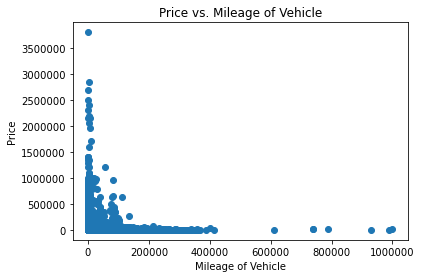

In [69]:
# Extract the age and price variables
mileage = dataset['mileage']
price = dataset['price']

# Create the scatter plot
plt.scatter(mileage, price)
plt.xlabel('Mileage of Vehicle')
plt.ylabel('Price')
plt.title('Price vs. Mileage of Vehicle')
plt.ticklabel_format(style='plain', axis='y')
plt.ticklabel_format(style='plain', axis='x')
plt.show()

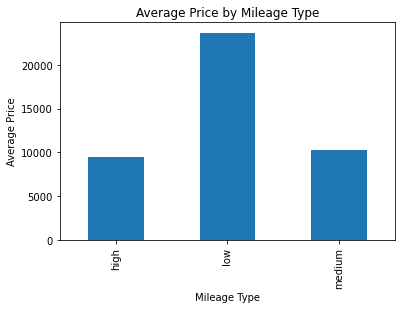

In [70]:
# Calculate the average price for each mileage type
average_prices = dataset.groupby('mileage_type')['price'].mean()

# Plot the average prices as a bar chart
average_prices.plot(kind='bar')
plt.xlabel('Mileage Type')
plt.ylabel('Average Price')
plt.title('Average Price by Mileage Type')
plt.show()

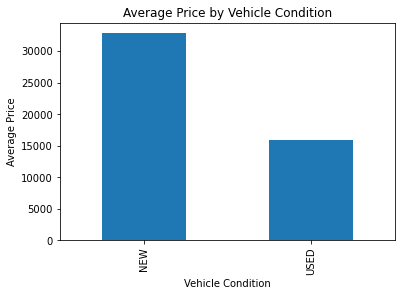

In [71]:
# Calculate the average price for each vehicle condition
average_prices = dataset.groupby('vehicle_condition')['price'].mean()

# Plot the average prices as a bar chart
average_prices.plot(kind='bar')
plt.xlabel('Vehicle Condition')
plt.ylabel('Average Price')
plt.title('Average Price by Vehicle Condition')
plt.show()

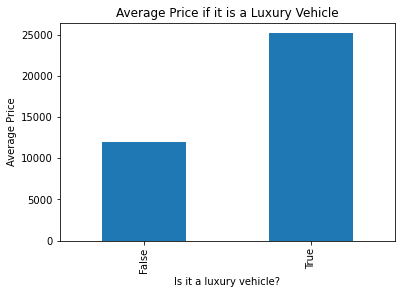

In [72]:
# Calculate the average price for luxury vehicle
average_prices = dataset.groupby('luxury_vehicle')['price'].mean()

# Plot the average prices as a bar chart
average_prices.plot(kind='bar')
plt.xlabel('Is it a luxury vehicle?')
plt.ylabel('Average Price')
plt.title('Average Price if it is a Luxury Vehicle')
plt.show()

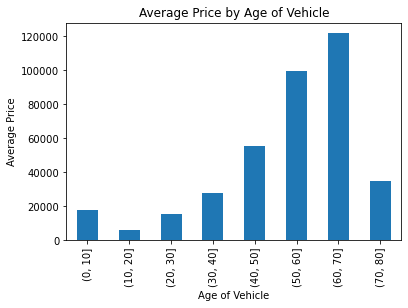

In [73]:
min_age = int(dataset['vehicle_age'].min())
max_age = int(dataset['vehicle_age'].max())
#min_age = dataset['vehicle_age'].min().astype(int)
#max_age = dataset['vehicle_age'].max().astype(int)

# Divide the age variable into bins based on the min and max values
bins = pd.cut(dataset['vehicle_age'], range(min_age, max_age+1, 10))

# Calculate the average price for each bin
average_prices = df.groupby(bins)['price'].mean()

# Plot the average prices as a bar chart
average_prices.plot(kind='bar')
plt.xlabel('Age of Vehicle')
plt.ylabel('Average Price')
plt.title('Average Price by Age of Vehicle')
plt.show()

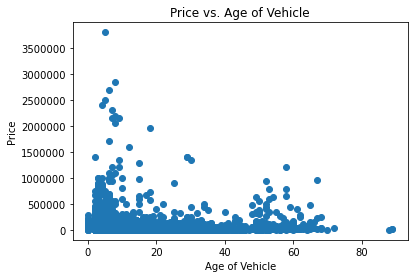

In [74]:
# Extract the age and price variables
age = dataset['vehicle_age']
price = dataset['price']

# Create the scatter plot
plt.scatter(age, price)
plt.xlabel('Age of Vehicle')
plt.ylabel('Price')
plt.title('Price vs. Age of Vehicle')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

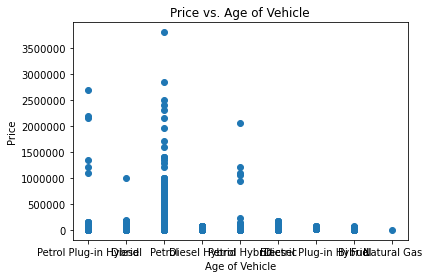

In [75]:
# Extract the age and price variables
age = dataset['fuel_type']
price = dataset['price']

# Create the scatter plot
plt.scatter(age, price)
plt.xlabel('Age of Vehicle')
plt.ylabel('Price')
plt.title('Price vs. Age of Vehicle')
plt.ticklabel_format(style='plain', axis='y')
plt.show()

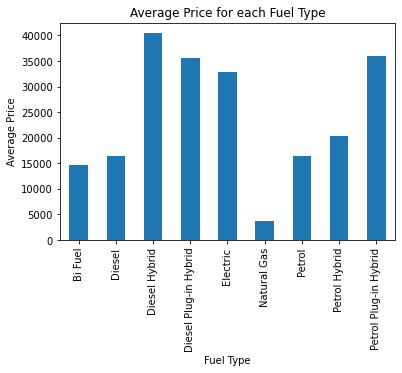

In [76]:
# Calculate the average price for each fuel type
average_prices = dataset.groupby('fuel_type')['price'].mean()

# Plot the average prices as a bar chart
average_prices.plot(kind='bar')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.title('Average Price for each Fuel Type')
plt.show()